# Preprocessing and EDA

### Goal of the project : build a machine learning model that is useful as a screening tool for predicting strokes, meaning that we will focus on detecting as many strokes as possible even if it will lead to a lot of false positives. So the most important metrics will be True Positive Rate (tpr) and AUC

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Preprocessing

Removing id col

In [4]:
df = df.drop('id',axis=1)

In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<Axes: xlabel='bmi', ylabel='Count'>

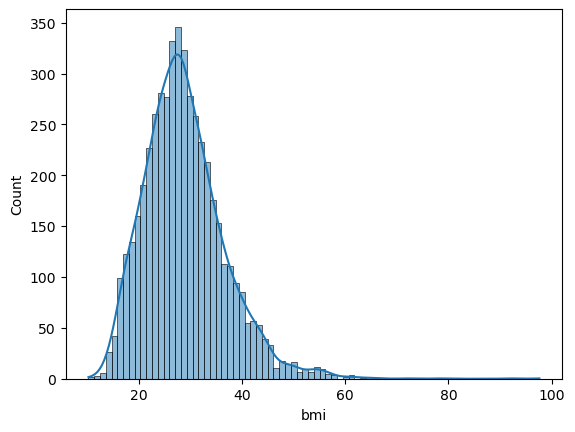

In [7]:
sns.histplot(data=df,x='bmi',kde=True)

Most of the values are around the average so, missing values will be filled with the mean.

In [10]:
mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(value=mean_bmi)

In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

It is not obvious what to do with the smoking status variable since, there is a lot of missing values, too many too drop them and also the variable itself is very likely to be a good predictor of strokes.

<Axes: xlabel='smoking_status'>

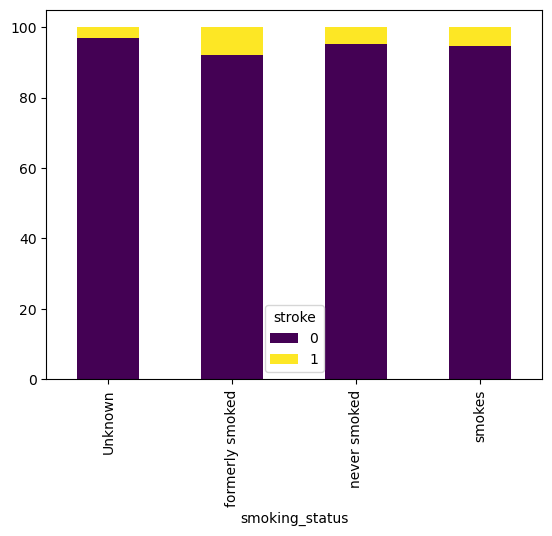

In [14]:
stroke_pct = df.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack() * 100
stroke_pct.plot(kind='bar', stacked=True, colormap='viridis')

Based on the distribution  unkown smoking status is closest to pepole that never smoked, which suggest that the unknown group is likely filled with non-smokers.

In [16]:
df['smoking_status'] = df['smoking_status'].replace('Unknown', 'never smoked')

In [17]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Only one row with gender other, will be dropped

In [18]:
df = df[df['gender'] != 'Other']

### All missing data filled

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


### EDA

##### Summary statistic for numerical variables. Age is discrete, while bmi and avg_glucose_level are continous.

In [28]:
df[['age', 'bmi', 'avg_glucose_level']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
bmi,5109.0,28.894508,7.698235,10.30,23.80,28.40,32.80,97.60
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74


##### Value counts and percentages for categorical variables

In [36]:
for col in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'stroke']:
    print(f"\nValue counts and percentages for '{col}':\n")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    print(summary)


Value counts and percentages for 'gender':

        Count  Percentage
gender                   
Female   2994        58.6
Male     2115        41.4

Value counts and percentages for 'hypertension':

              Count  Percentage
hypertension                   
0              4611       90.25
1               498        9.75

Value counts and percentages for 'heart_disease':

               Count  Percentage
heart_disease                   
0               4833        94.6
1                276         5.4

Value counts and percentages for 'ever_married':

              Count  Percentage
ever_married                   
Yes            3353       65.63
No             1756       34.37

Value counts and percentages for 'work_type':

               Count  Percentage
work_type                       
Private         2924       57.23
Self-employed    819       16.03
children         687       13.45
Govt_job         657       12.86
Never_worked      22        0.43

Value counts and percentages 

<Axes: xlabel='stroke', ylabel='count'>

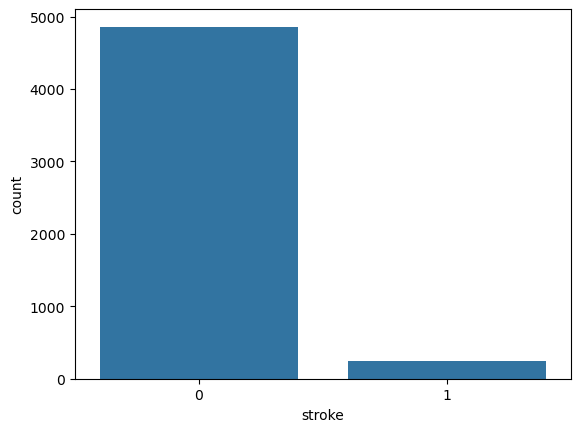

In [19]:
sns.countplot(data=df,x='stroke')

Highly imbalanced target variable, which means that accuracy will not be a good metric, rather AUC and TPR.

<Axes: xlabel='smoking_status'>

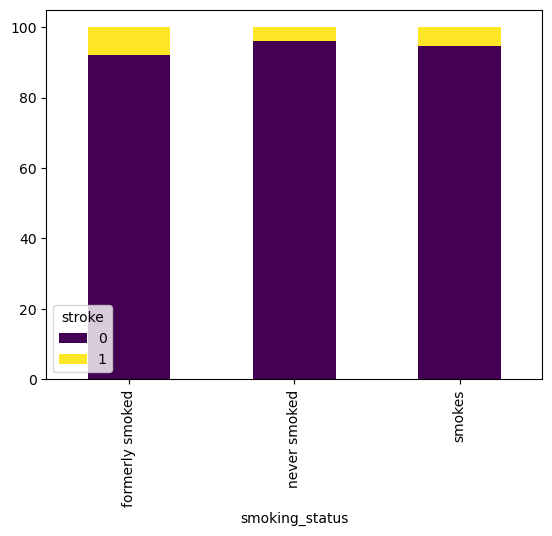

In [37]:
stroke_pct = df.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack() * 100
stroke_pct.plot(kind='bar', stacked=True, colormap='viridis')

In [38]:
stroke_pct

stroke,0,1
smoking_status,,
formerly smoked,92.081448,7.918552
never smoked,96.012806,3.987194
smokes,94.676806,5.323194


Intrestingly the relative stroke risk is the highest in people who formerly smoked rather than thpse who currently smoke.

##### Now lets look at how does it compare between genders

<Axes: xlabel='gender'>

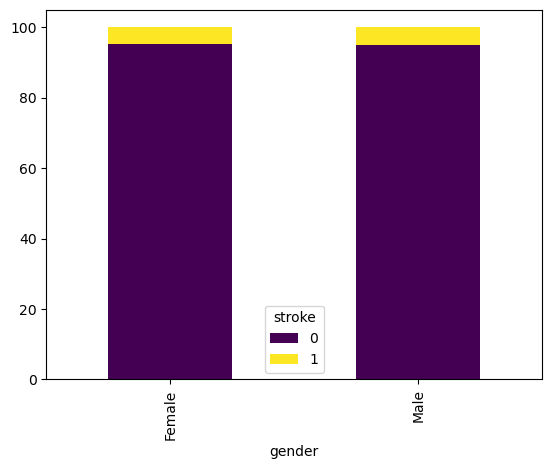

In [39]:
stroke_pct_gender = df.groupby('gender')['stroke'].value_counts(normalize=True).unstack() * 100
stroke_pct_gender.plot(kind='bar', stacked=True, colormap='viridis')

In [40]:
stroke_pct_gender

stroke,0,1
gender,,
Female,95.290581,4.709419
Male,94.893617,5.106383


Marginally higher risk of stroke in males

##### Bmi and glucose levels for stroke

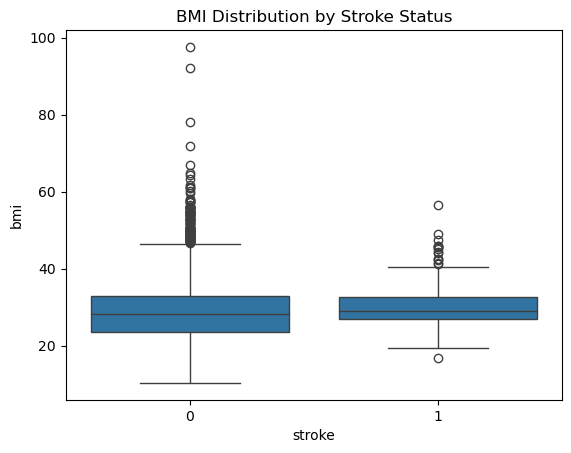

In [41]:
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI Distribution by Stroke Status')
plt.show()

Bmi is slightly higher for those who had a stroke, however there are a lot of outliers

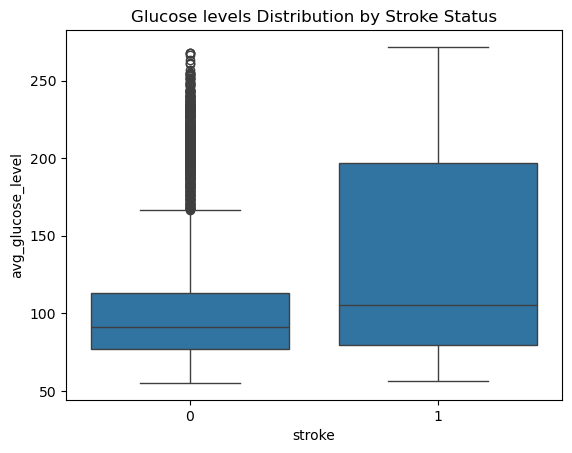

In [42]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Glucose levels Distribution by Stroke Status')
plt.show()

We can observe significantly higher glucose levels in stroke victims,  this also suggests that there is no strong relation between bmi and glucose levels

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

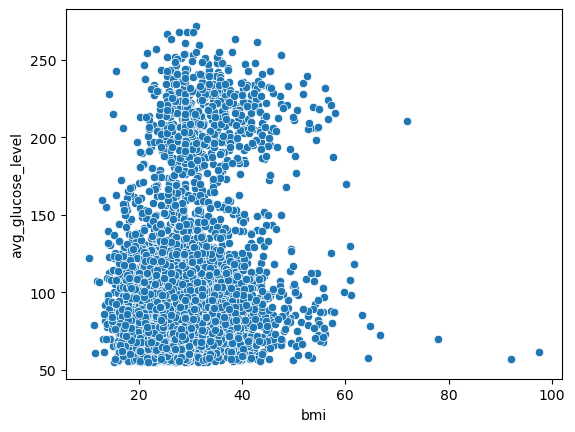

In [43]:
sns.scatterplot(data=df,x='bmi',y='avg_glucose_level')

There doesn't seem to be a strong correlation

In [44]:
r, p = pearsonr(df['bmi'], df['avg_glucose_level'])

print(f"Pearson correlation: {r:.3f}")
print(f"P-value: {p:.5f}")

Pearson correlation: 0.169
P-value: 0.00000


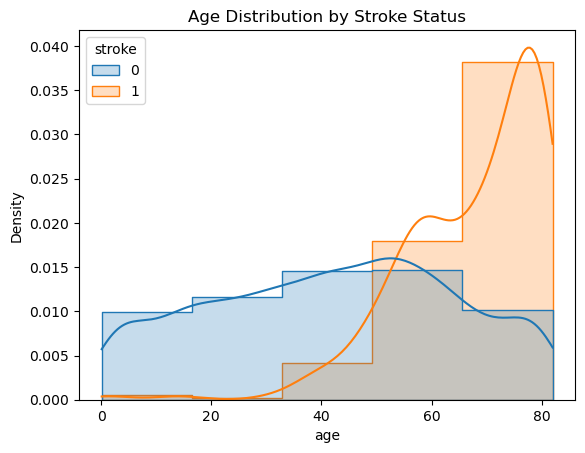

In [45]:
sns.histplot(data=df, x='age', hue='stroke', kde=True, element='step', stat='density', common_norm=False,bins=5)
plt.title('Age Distribution by Stroke Status')
plt.show()

From the plot, we can observe that older people where far more likely to have a stroke and that in general almost all strokes happend to people above 50.

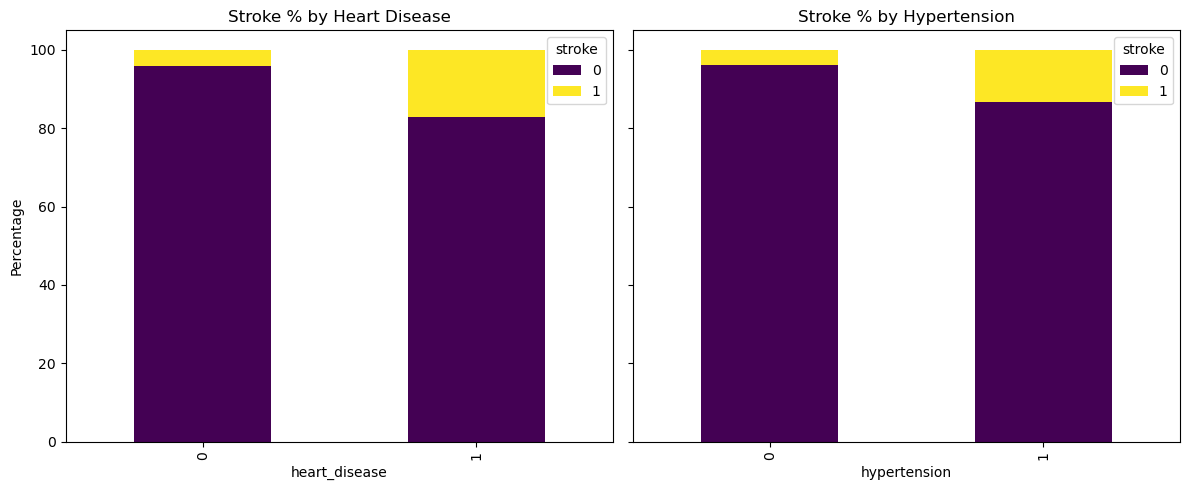

In [49]:
stroke_pct_hd = df.groupby('heart_disease')['stroke'].value_counts(normalize=True).unstack() * 100
stroke_pct_ht = df.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack() * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

stroke_pct_hd.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[0])
axes[0].set_title('Stroke % by Heart Disease')
axes[0].set_ylabel('Percentage')

stroke_pct_ht.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[1])
axes[1].set_title('Stroke % by Hypertension')

plt.tight_layout()
plt.show()

And also we can clearly see that both hypertension and heart disease have a huge effect on the risk of stroke.

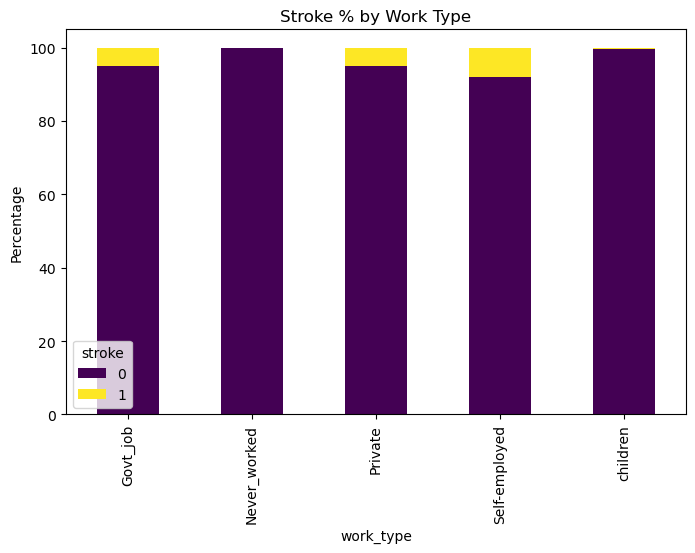

In [53]:
stroke_pct_work = df.groupby('work_type')['stroke'].value_counts(normalize=True).unstack() * 100
stroke_pct_work.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))
plt.title('Stroke % by Work Type')
plt.ylabel('Percentage')
plt.show()

Finally looking at work type, firstly this confirms that strokes almost exclusivly happend to old people, as both children and people who never worked which are likely students so almost all of them are younger than ~ 25 almost never had strokes. Also self-employed people had the most strokes which makes sense considering that running your own buisness often involves much more working hours and stress compared to typical private sector or public sector jobs.

##### Also after exploring the data we can see that the information about patients is very basic. Almost all of them coming from a simple interview with a doctor. Which further supports the idea of a screening model, which could be deployed after this basic interview to indicate wheter more advanced tests should be performed. The two exceptions would be hypertension and heart disease however conisdering that both of these diagnosis require respectivly a blood preaussure test and an ECG, there likely would be more metrics present in this data so I think its much more likely that both of these variable are based on the patient's medical history. 

In [63]:
df.to_csv('preprocessed_data.csv')